# **Finding the Lane Lines**

## **Imports**

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

## **Historgram**

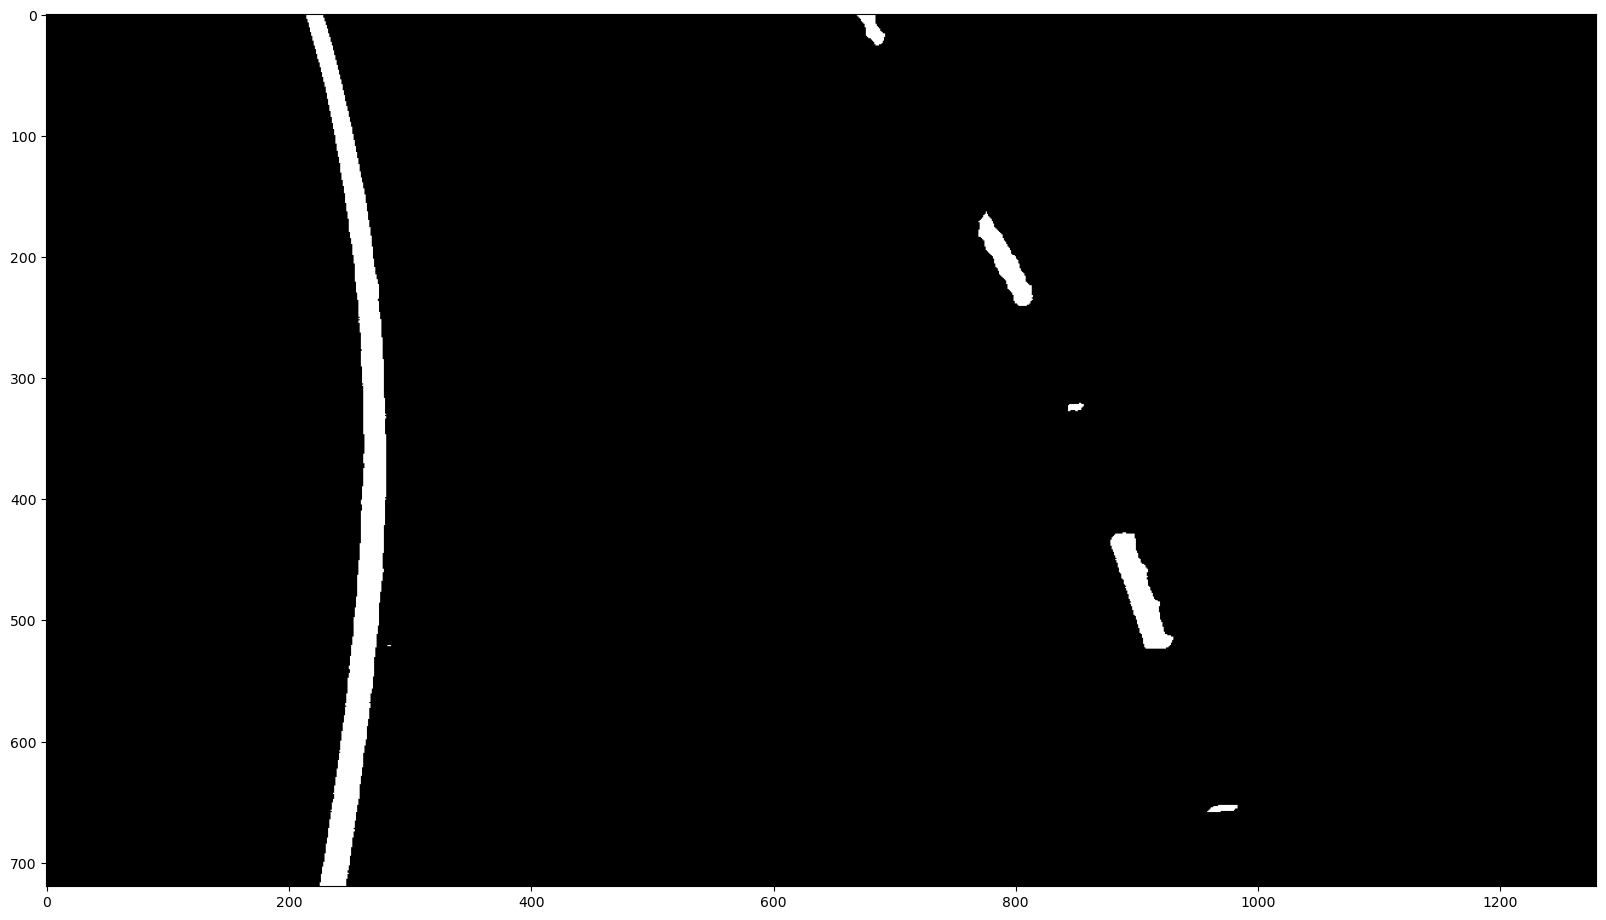

In [62]:
img = cv2.imread('book_images/threshold.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(img, cmap='gray')

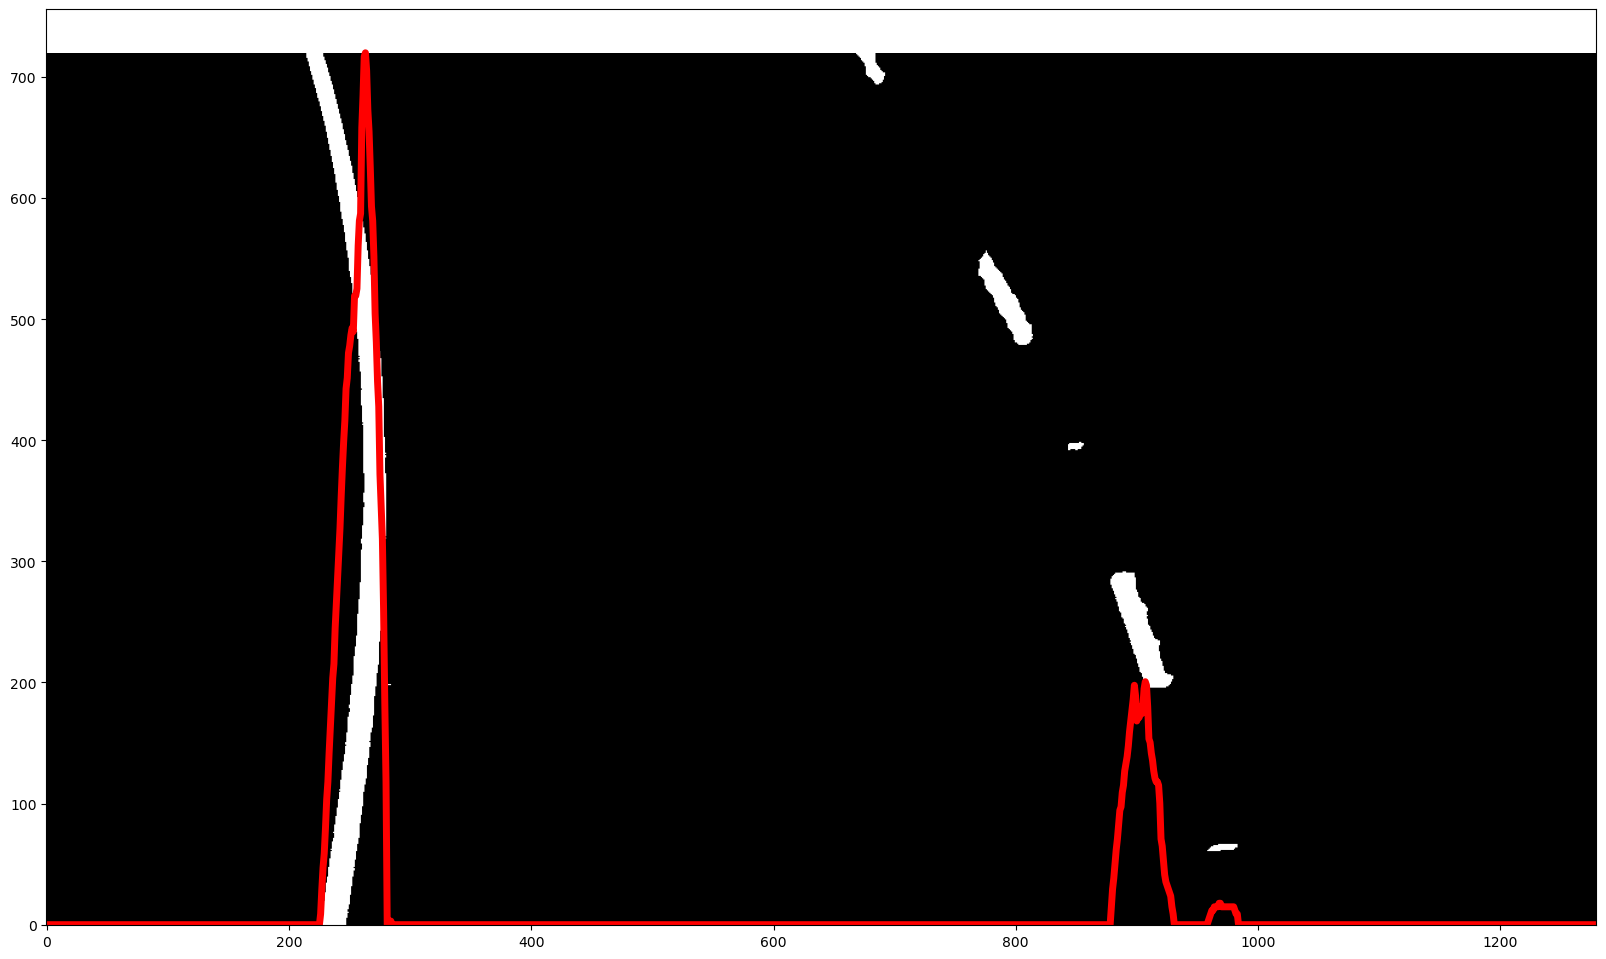

In [68]:
hist = np.sum(img[img.shape[0] // 2:, :], axis=0)

hist_scaled = hist.astype('float32')
hist_scaled *= (img.shape[0]) / hist.max()

implot = plt.imshow(np.flipud(img), origin='lower', cmap='gray')
plt.plot(hist_scaled, linewidth=5, color='red')
plt.show()

In [78]:
# Create historgram
hist = np.sum(img[img.shape[0] // 2:, :], axis=0)

# Define midpoint of historgram
midpoint = int(hist.shape[0] / 2)

# Define base location of left and right lines based on the peak
# of the histograms to the left and right of the midpoint
leftx_base = np.argmax(hist[:midpoint])
rightx_base = np.argmax(hist[midpoint:]) + midpoint

# Define the number of sliding windows and window height
n_windows = 9
window_height = int(img.shape[0] // n_windows)

# Define margin for window width
margin = 100

# Create pointers for x and y locations
leftx_curr = leftx_base
rightx_curr = rightx_base
y_curr = img.shape[0] + window_height // 2

# Create empty lists to store x and y locations of white pixels
leftx, lefty, rightx, righty = [], [], [], []

non_zero = img.nonzero()
non_zero_x = np.array(non_zero[0])
non_zero_y = np.array(non_zero[1])

In [80]:
non_zero_y

array([215, 216, 217, ..., 245, 246, 247], dtype=int64)